Vaccine Hesitancy and Vaccine Distribution by ethnicity 

In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
from IPython.display import set_matplotlib_formats

%matplotlib inline

Import data

In [16]:
data = pd.read_csv("VaccHes_ByEtchinicty_combined.csv")

In [17]:
df = pd.DataFrame(data=data)

Plots

In [18]:
df.head()

,Ethnicity,Ethnicity_index,Population,Pop_percentage,VaccConfidency_percentage,1stDose,1stDose_perc,2ndDose,2ndDose_perc,CumulativeDoses_totalToDate,CumulativeDoses_perc
0,TotalPopulation,0,56075912.0,100.0,82.0,5792159.0,100.00,440425.0,100.00,6232584.0,100.00
1,Any other Asian background,1,1228861.0,2.2,86.1,87174.0,1.51,9365.0,2.13,168639.0,2.71
2,Indian,2,1412958.0,2.5,79.4,146075.0,2.52,12530.0,2.84,158605.0,2.54
3,Pakistani/Bangladeshi,3,1571712.0,2.8,57.7,61067.0,1.05,3911.0,0.89,64978.0,1.04
4,Black or Black British,4,1864890.0,3.3,28.2,88117.0,1.52,4336.0,0.98,92453.0,1.48


In [19]:
selectData = df['Ethnicity_index']>0
selectData= df[selectData]


Plot Vaccine Confidency by ethnicity

In [20]:
selectData =selectData.sort_values(by="VaccConfidency_percentage", ascending=False)


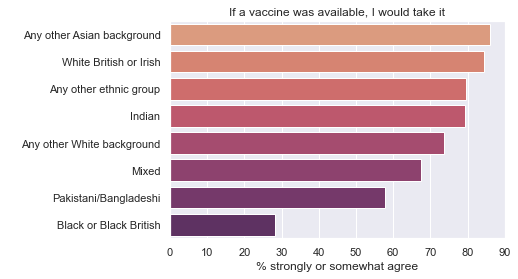

In [21]:
sns.set_style("whitegrid")
sns.set_theme(font="Arial")
plt.tight_layout()
plt.title('If a vaccine was available, I would take it')
plt.xlim([20,90])

bar = sns.barplot(data=selectData, y="Ethnicity", x="VaccConfidency_percentage", palette='flare')            
bar.set(xlabel='% strongly or somewhat agree', ylabel=' ')   
bar.set_xlim([0,90])
plt.savefig('HesitancyByEthnicity_zero.svg', format='svg')

 Plot Vaccinations Delivered by Ethnicity, raw number

In [22]:
selectData =selectData.sort_values(by="CumulativeDoses_perc", ascending=False)

[Text(0.5, 0, 'Vaccinated British (by ethcnicity, percentage of cumulative doses)'),
 Text(0, 0.5, ' ')]

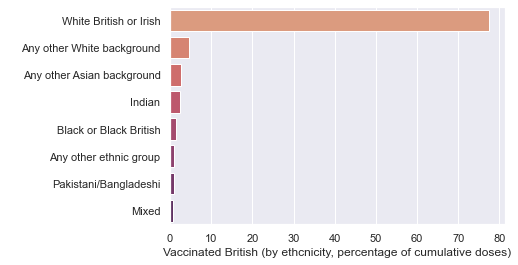

In [23]:
sns.set_style("whitegrid")
sns.set_theme(font="Arial")

plt.tight_layout()
#plt.title(plot_title)
#plt.xlim([0,80])

bar = sns.barplot(data=selectData, y="Ethnicity", x="CumulativeDoses_perc", palette='flare')            
bar.set(xlabel='Vaccinated British (by ethcnicity, percentage of cumulative doses)', ylabel=' ') 

Vaccinated people by ethnicity per 100 people

In [24]:
per100people = (selectData['CumulativeDoses_totalToDate']/selectData['Population'])*100

In [25]:
selectData['Vaccinated by ethnicity per 100 people'] = per100people



In [26]:
selectData =selectData.sort_values(by="Vaccinated by ethnicity per 100 people", ascending=False)

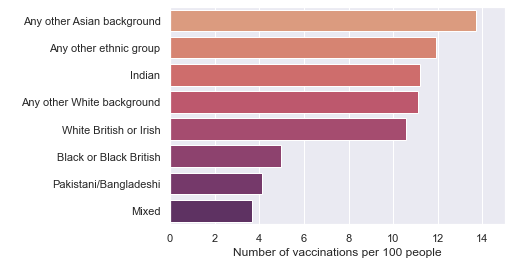

In [27]:
sns.set_theme(font="Arial")

plt.tight_layout()
#plt.title(plot_title)
plt.xlim([0,15])

bar = sns.barplot(data=selectData, y="Ethnicity", x="Vaccinated by ethnicity per 100 people", palette='flare')            
bar.set(xlabel='Number of vaccinations per 100 people', ylabel=' ') 
#bar.set_xticklabels(bar.get_xmajorticklabels(), fontsize = 60)
plt.savefig('VaccinationByEthnicity.svg', format='svg')

  Plot correlation

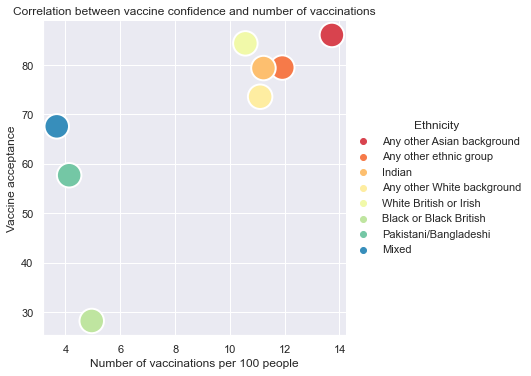

In [31]:
ax = sns.relplot(x="Vaccinated by ethnicity per 100 people", y="VaccConfidency_percentage", data=selectData, hue ="Ethnicity", s=600, palette="Spectral")               
ax.set(ylabel='Vaccine acceptance', xlabel='Number of vaccinations per 100 people') 

plt.title('Correlation between vaccine confidence and number of vaccinations')
plt.savefig('CorrelationHesVacs.svg', format='svg')

In [35]:
data

,Ethnicity,Ethnicity_index,Population,Pop_percentage,VaccConfidency_percentage,1stDose,1stDose_perc,2ndDose,2ndDose_perc,CumulativeDoses_totalToDate,CumulativeDoses_perc
0,TotalPopulation,0,56075912.0,100.0,82.0,5792159.0,100.00,440425.0,100.00,6232584.0,100.00
1,Any other Asian background,1,1228861.0,2.2,86.1,87174.0,1.51,9365.0,2.13,168639.0,2.71
2,Indian,2,1412958.0,2.5,79.4,146075.0,2.52,12530.0,2.84,158605.0,2.54
3,Pakistani/Bangladeshi,3,1571712.0,2.8,57.7,61067.0,1.05,3911.0,0.89,64978.0,1.04
4,Black or Black British,4,1864890.0,3.3,28.2,88117.0,1.52,4336.0,0.98,92453.0,1.48
5,Mixed,5,1224400.0,2.2,67.6,42476.0,0.73,2595.0,0.59,45071.0,0.72
6,Any other ethnic group,6,563696.0,1.0,79.5,62971.0,1.09,4178.0,0.95,67149.0,1.08
7,Any other White background,7,2543622.0,4.5,73.6,262186.0,4.53,20266.0,4.60,282452.0,4.53
8,White British or Irish,8,45665773.0,81.4,84.4,4475951.0,77.28,348801.0,79.20,4824752.0,77.41
